# Env Setup

In [1]:
import pandas as pd
df = pd.read_csv('data/samples.csv', index_col=0)
dfc = pd.read_csv('data/category.csv')

# Display Option

In [2]:
pd.set_option('display.max_rows', 100)

# Glace

In [3]:
df

,item_name,item_type,category
0,統一大補帖當歸鴨細麵,民生食材類,各式麵條/拌麵
1,辛香菇杯麵,民生食材類,各式麵條/拌麵
2,(V)卜蜂義式輕食沙拉胸(4℃/110g),民生食材類,各式麵條/拌麵
3,五木雞蛋麵經濟包2kg,民生食材類,各式麵條/拌麵
4,昇泰,民生食材類,各式麵條/拌麵
...,...,...,...
1584523,新鮮芒果西瓜牛奶綿綿冰,冰品類,甜筒
1584524,特大杯焦糖可可碎片星冰樂 2023-05-26 h1us-q,冰品類,甜筒
1584525,百香芒果冰沙,冰品類,現調冰品
1584526,檸檬冰磚,冰品類,其他冰品


In [4]:
dfc

,item_type,category,description,item1,item2
0,咖啡類,現做咖啡飲品,從咖啡廳、超商、超市中現煮的咖啡商品,全家特濃拿鐵,西西里風味檸檬氣泡咖啡
1,咖啡類,罐裝/瓶裝咖啡,使用鋁罐或寶特瓶裝可馬上飲用的咖啡液體,《UCC》無糖咖啡飲料185g,SANGARIA 圓潤咖啡飲料-拿鐵 (280gx24入)
2,咖啡類,沖泡式咖啡,多合一的沖泡式咖啡(粉末),西雅圖即品拿鐵無加糖2合1咖啡21g,【King Coffee 王者咖啡】經典風味推薦組：三合一滴滴煉奶即溶咖啡
3,咖啡類,濾掛式咖啡,使用濾掛的咖啡,【熙舍咖啡】義大利濾掛式咖啡綜合風味10g/包,《西雅圖》極品濾掛咖啡-曼巴風情(50入/盒)
4,咖啡類,即溶咖啡,具有顆粒加水便可馬上融化的咖啡，通常為罐裝。(排除多合一且多數為黑咖啡),AGFMAXIM咖啡罐(藍)-奢華摩登 (80g),AGFMAXIM咖啡罐(藍)-奢華摩登 (80g)
...,...,...,...,...,...
171,菸酒類,紅白酒,在商店販賣的葡萄酒，紅酒由葡萄製成，白酒由白葡萄製成，可參考https://www.nmpl...,玉泉法國紅葡萄酒,昆斯特樂麗絲玲白酒
172,菸酒類,香檳氣泡酒,在商店販賣的香檳或有發泡性的酒，可參考https://www.my9.com.tw/coll...,杜瓦樂華 玫瑰微甜香檳,西班牙 北極熊氣泡酒
173,菸酒類,藥酒,將藥物置於75％酒精或白酒中浸泡而成的保健食品(這邊暫時歸類在酒類，後續調整至保健食品類)，...,【大鵰】蔘茸藥酒300ml*24(乙類成藥),【養命酒】日本藥用養命酒700ML×2瓶
174,菸酒類,高粱,如類別名稱，可參考https://www.my9.com.tw/collections/ba...,38°金門高粱酒,金門紅標高粱58%


# Validation

In [5]:
for i in [
    set(dfc.category) - set(df.category),
    set(df.category) - set(dfc.category),
    set(dfc.item_type) - set(df.item_type),
    set(df.item_type) - set(dfc.item_type),
]:
    print(i)

set()
set()
set()
set()


# rare samples

In [6]:
df_count = df.groupby(['item_type', 'category']).count()
df_count['item_name_dedupe'] = df.drop_duplicates('item_name').groupby(['item_type', 'category']).count()['item_name']


In [7]:
len(set(map(lambda x: x[0], df_count.index)))

26

In [8]:
len(set(map(lambda x: x[1], df_count.index)))

176

In [9]:
df_count

item_name  item_name_dedupe
item_type category                             
3C類       手機/通訊/週邊     246679            245592
          桌機/筆電/平板     149160            148913
          相機/攝影/DV       6425              6358
          虛擬/點數商品           1                 1
          週邊/耗材         16727             16389
...                       ...               ...
點心/零食類    肉乾/肉紙          9741              9229
          蔬片乾               1                 1
          豆乾              596               527
          餅乾            26196             23018
          魷魚絲             158               136

[176 rows x 2 columns]

In [10]:
df_count[df_count['item_name']<10].shape#.iloc[20:]

(43, 2)

In [11]:
rare_sample_cat = set(df_count[df_count['item_name'] < 10].reset_index()['category'])

In [12]:
df[df['category'].apply(lambda x: x in rare_sample_cat)]

,item_name,item_type,category
55420,龜田製果 嬰兒米果 53g 龜田 嬰兒米餅 日本米餅,民生食材類,嬰幼兒食品
55421,德國製PowR1乾糧 德軍採購同款(軍糧,民生食材類,其他民生食材
55422,【京工養生館】芋頭香菇粥(30gx24包),民生食材類,沖泡即食品
56286,100%純生乳奶粉 隨手包,民生食材類,奶粉
56287,玄米油,民生食材類,油
177948,BLACK POWER黑水運動機能礦泉水,水類,機能水
208697,【華燈市】法蘭西銀6+2半吸頂燈,傢俱/家飾類,燈具
210403,(M)大關花泡香桃子氣泡清酒250ml,菸酒類,清酒
210404,月桂冠清酒,菸酒類,清酒
210405,金門特級高粱38度,菸酒類,清酒


In [13]:
import matplotlib.font_manager
 # matplotlib.__file__
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    print(i)

C059
C059
C059
C059
D050000L
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif Display
Inconsolata
Inconsolata
Nimbus Mono PS
Nimbus Mono PS
Nimbus Mono PS
Nimbus Mono PS
Nimbus Roman
Nimbus Roman
Nimbus Roman
Nimbus Roman
Nimbus Sans
Nimbus Sans
Nimbus Sans
Nimbus Sans
Nimbus Sans Narrow
Nimbus Sans Narrow
Nimbus Sans Narrow
Nimbus Sans Narrow
P052
P052
P052
P052
STIXGeneral
STIXGeneral
STIXGeneral
STIXGeneral
STIXNonUnicode
STIXNonUnicode
STIXNonUnicode
STIXNonUnicode
STIXSizeFiveSym
STIXSizeFourSym
STIXSizeFourSym
STIXSizeOneSym
STIXSizeOneSym
STIXSizeThreeSym
STIXSizeThreeSym
STIXSizeTwoSym
STIXSizeTwoSym
Source Code Pro
Source Code Pro
Source Code 

In [14]:
from matplotlib import pyplot as plt

In [15]:
import matplotlib
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

In [16]:
len(set(df.item_type))

26

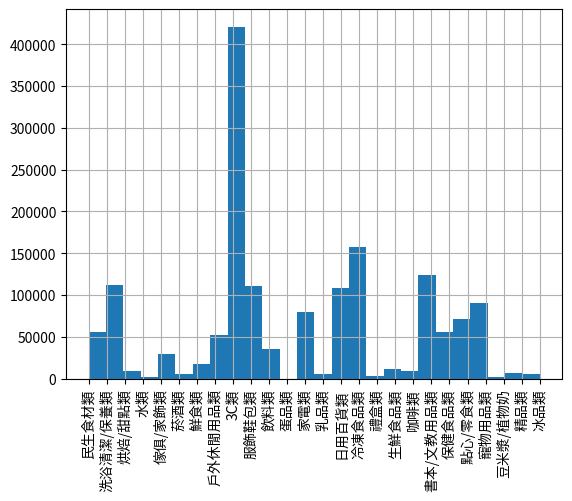

In [17]:
df['item_type'].hist(
    bins=len(set(df.item_type)),
    # log=True,
)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

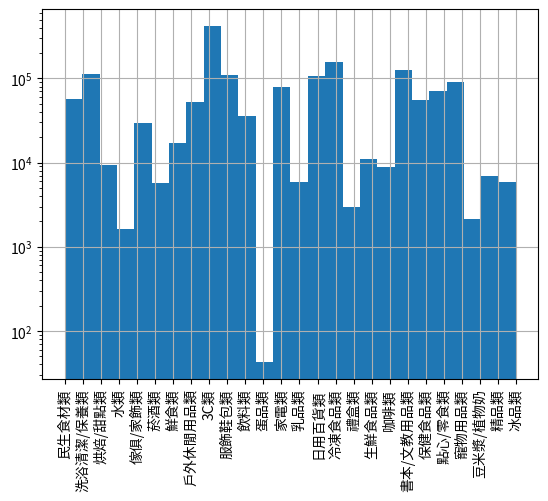

In [18]:
df['item_type'].hist(
    bins=len(set(df.item_type)),
    log=True,
)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [19]:
dfc.iloc[172]['description']

'在商店販賣的香檳或有發泡性的酒，可參考https://www.my9.com.tw/collections/%E9%A6%99%E6%AA%B3%E6%B0%A3%E6%B3%A1%E9%85%92'

1. URL included?